In [1]:
!unzip PalmerPenguinsDataset.zip

Archive:  PalmerPenguinsDataset.zip
  inflating: Palmer Penguins Dataset.csv  


In [2]:
import pandas as pd

palmer = pd.read_csv('Palmer Penguins Dataset.csv')
palmer.head() # inspecting database, incorrect ot missing values, columns names, data types

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
palmer.info() # looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [4]:
palmer.duplicated().sum() # searching duplicates

0

In [7]:
df = pd.DataFrame(palmer)
palmer_clean = df.dropna() # deleting missing values (NaN)

In [13]:
most_common = palmer_clean['sex'].mode()[0]
palmer_clean.loc[:, 'sex'] = palmer_clean['sex'].fillna(most_common) # filling missing values in sex column with the most common value

In [15]:
palmer_clean['sex'].unique() # checking for unique values (if NaN was not filled )

array(['male', 'female'], dtype=object)

In [16]:
palmer_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


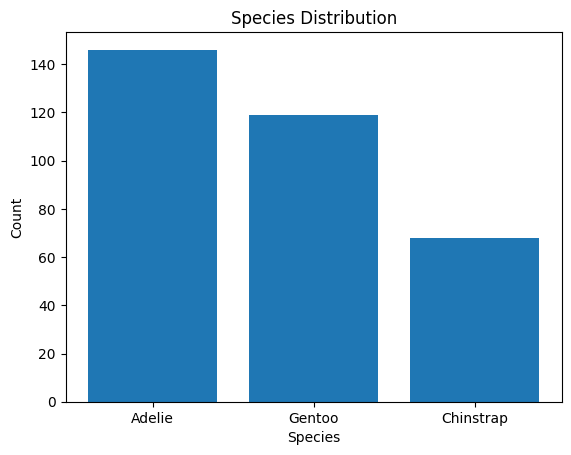

In [17]:
# Species Distribution: Use a bar chart to show the distribution of penguin species.
import matplotlib.pyplot as plt

species_counts = palmer_clean['species'].value_counts()
# creating a simple bar chart
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.show()

The most common species are Adelie and Gentoo

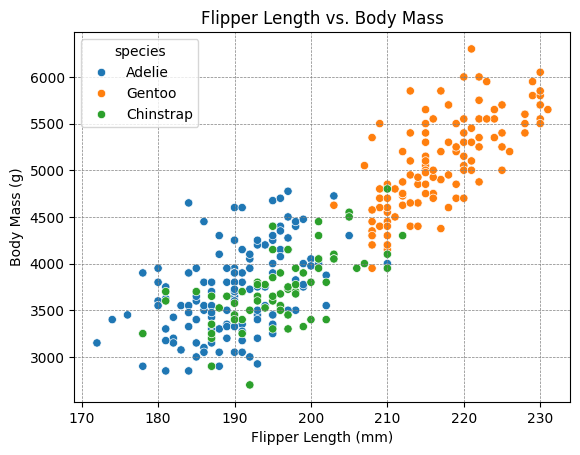

In [53]:
# Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
import matplotlib.pyplot as plt
import seaborn as sns
# creating scatter plot with seaborn,
sns.scatterplot(data=palmer_clean, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs. Body Mass')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray') # adding grid for readability
plt.show()

The longer the flipper, the larger the size of the individual and, accordingly, the greater the body weight. Species Adelie and Chinstar has similar parameters.

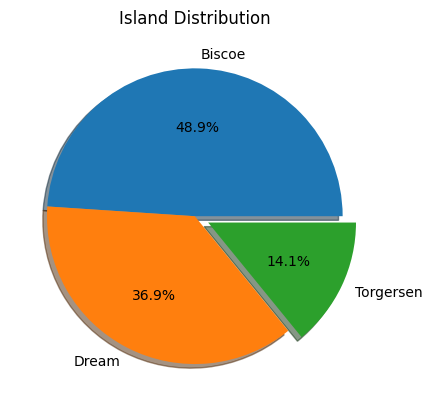

In [24]:
# Island Distribution: Visualize the count of penguins on each island using a pie chart.
import matplotlib.pyplot as plt
explode = (0, 0, 0.1) # creating explode for the smallest amount for better visualization

island_counts = palmer_clean['island'].value_counts()
plt.pie(island_counts.values, labels=island_counts.index, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title('Island Distribution')
plt.show()

the population is concentrated almost equally on two islands, with only 14% represented on the third island. We can conclude that there are the least favorable living conditions for the most common species of penguins

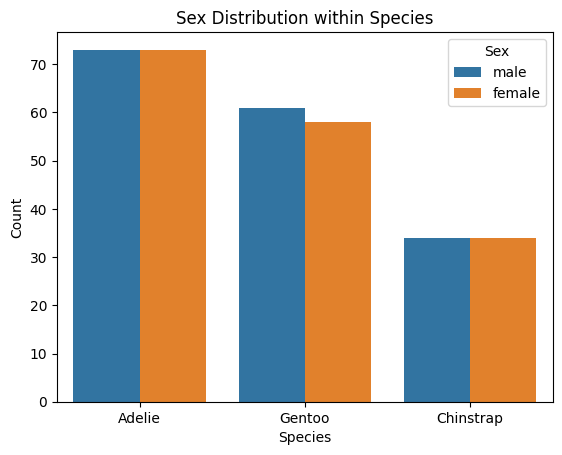

In [25]:
# Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=palmer_clean, x='species', hue='sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Sex Distribution within Species')
plt.legend(title='Sex')
plt.show()

the population is equally divided into males and females

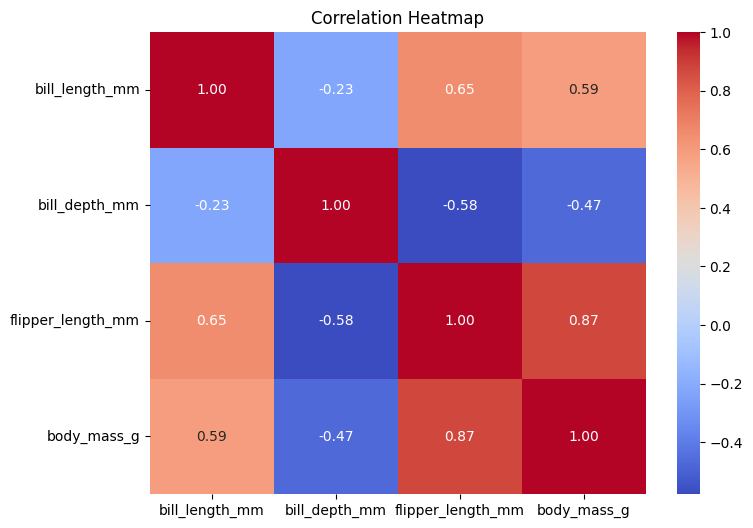

In [27]:
# Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
import matplotlib.pyplot as plt
import seaborn as sns
# variable for all numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
correlation_matrix = palmer_clean[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


as we already noticed, body mass is correlated to flipper length, and bill length and depth are correlated to flipper length.

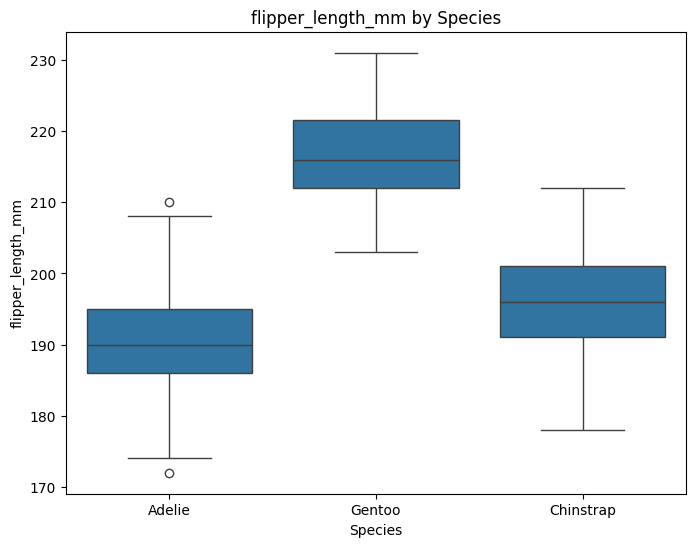

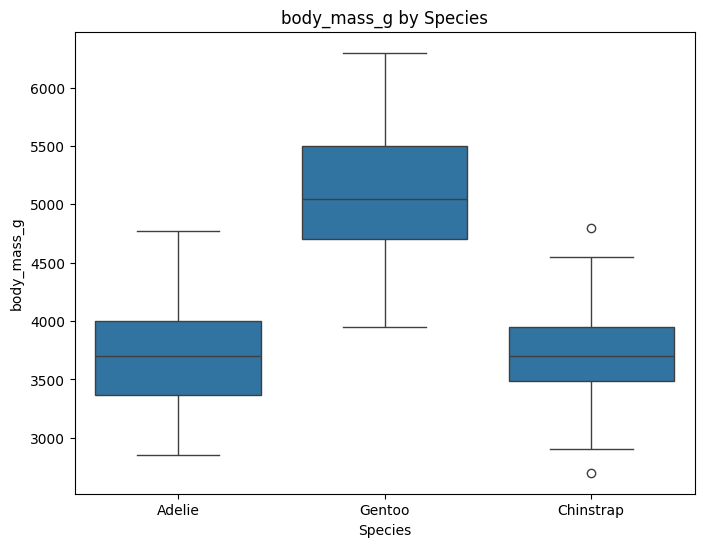

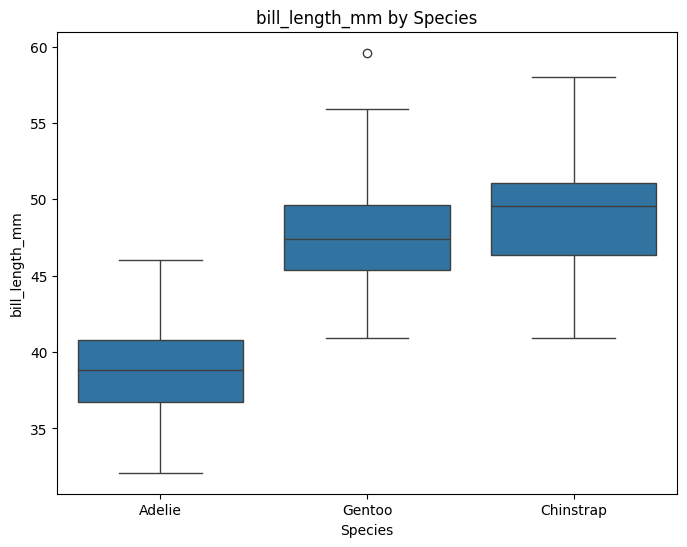

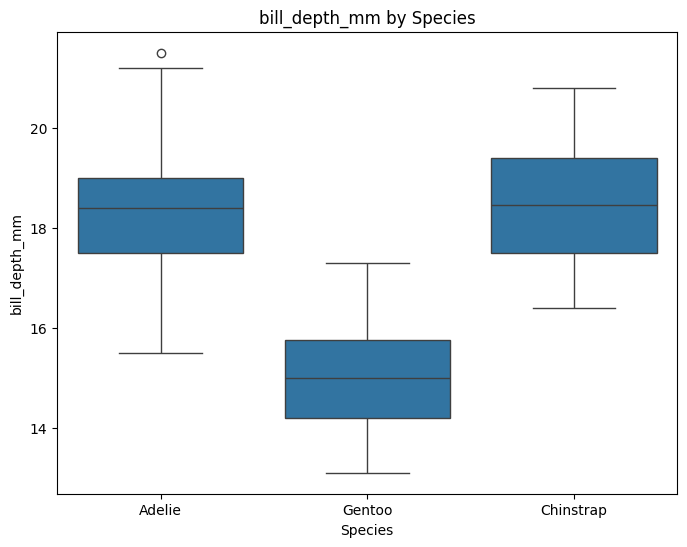

In [28]:
# Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=palmer_clean, x='species', y=column)
    plt.xlabel('Species')
    plt.ylabel(column)
    plt.title(f'{column} by Species')
    plt.show()


each species has its own unique parameters that define it. By the length of the flipper you can determine the specific specie. The body weight and bill depth of the Chinstar and Adelie species are similar, but the bill length is different, allowing them to be differentiated

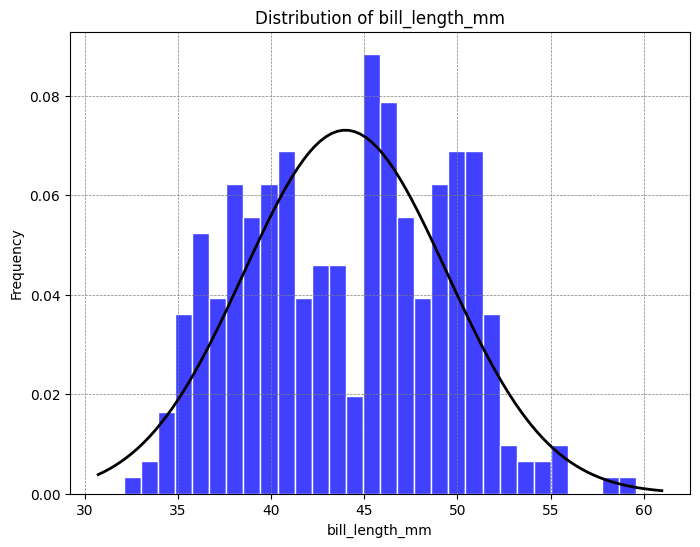

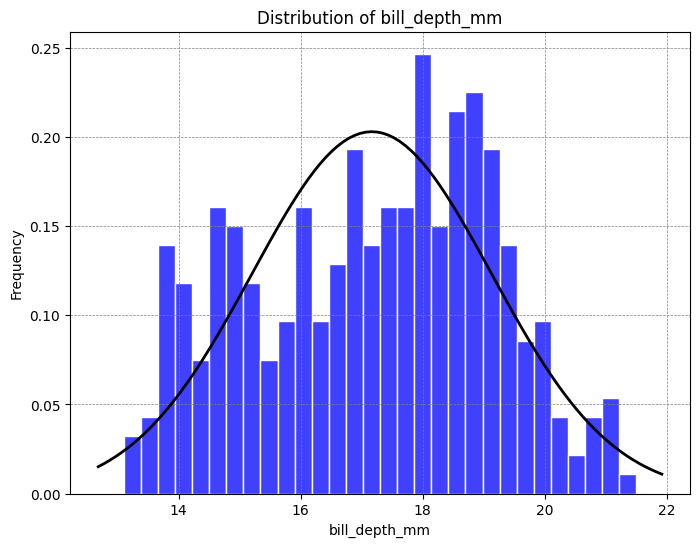

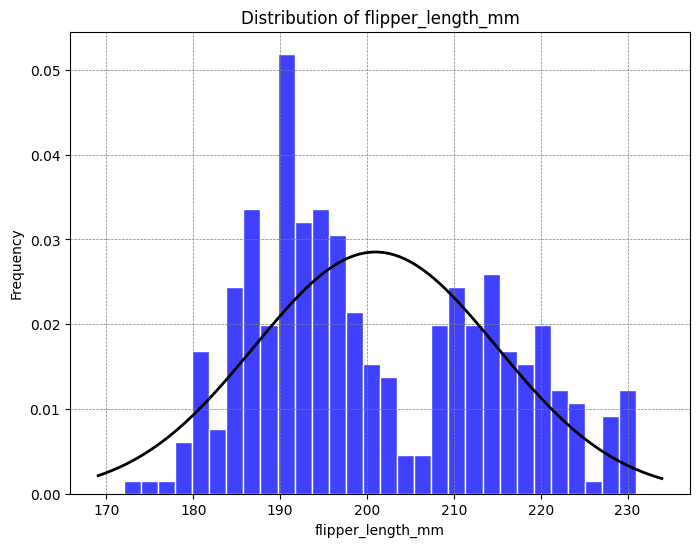

In [70]:
# Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    # creating more advanced histogram with seaborn to add normal distribution curve on it
    sns.histplot(palmer_clean[column], kde=False, bins=30, edgecolor='w', color='blue', stat='density')

    mu, std = stats.norm.fit(palmer_clean[column]) # returning standart deviation and mean values
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2) # adding curve to hist

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.title(f"Distribution of {column}")
    plt.show()

all values are not distributed symmetrically, relative to the norm (mean). We can identify subgroups of values that stand out in the graph with a low frequency relative to the average value of bill length, and very high and very low in bill depth and flipper length. Зerhaps this is due to the fact that depending on the island, living conditions are different and different types of penguins thus adapt to these conditions. Or there can be a lot of outliers, which are indicated by extremely large and small values

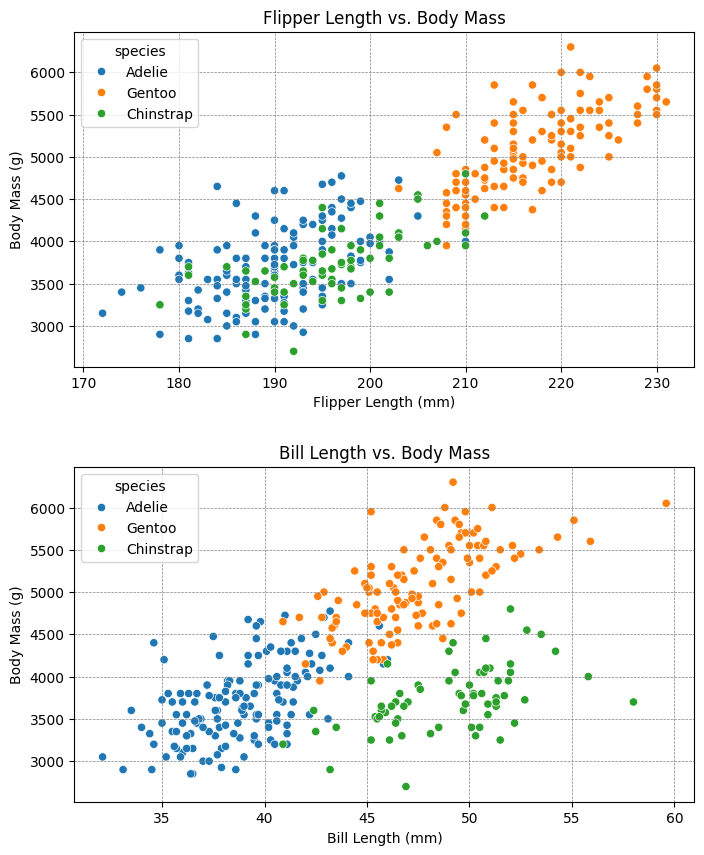

In [61]:
# Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 10))

# First subplot
sns.scatterplot(data=palmer_clean, x='flipper_length_mm', y='body_mass_g', hue='species', ax=ax1)
ax1.set_title('Flipper Length vs. Body Mass')
ax1.set_xlabel('Flipper Length (mm)')
ax1.set_ylabel('Body Mass (g)')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Second subplot
sns.scatterplot(data=palmer_clean, x='bill_length_mm', y='body_mass_g', hue='species', ax=ax2)
ax2.set_title('Bill Length vs. Body Mass')
ax2.set_xlabel('Bill Length (mm)')
ax2.set_ylabel('Body Mass (g)')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.subplots_adjust(hspace=0.3)

plt.show()

the relationship between ишдд length and body weight varies from species to species, dividing them into two big subgroups. While bill length versus body mass reduces all species to a common average, excluding outliers. It can be said that the dependence of bill length on body weight is not the fundamental difference between species and perhaps depends only on the habitat of specific individuals.

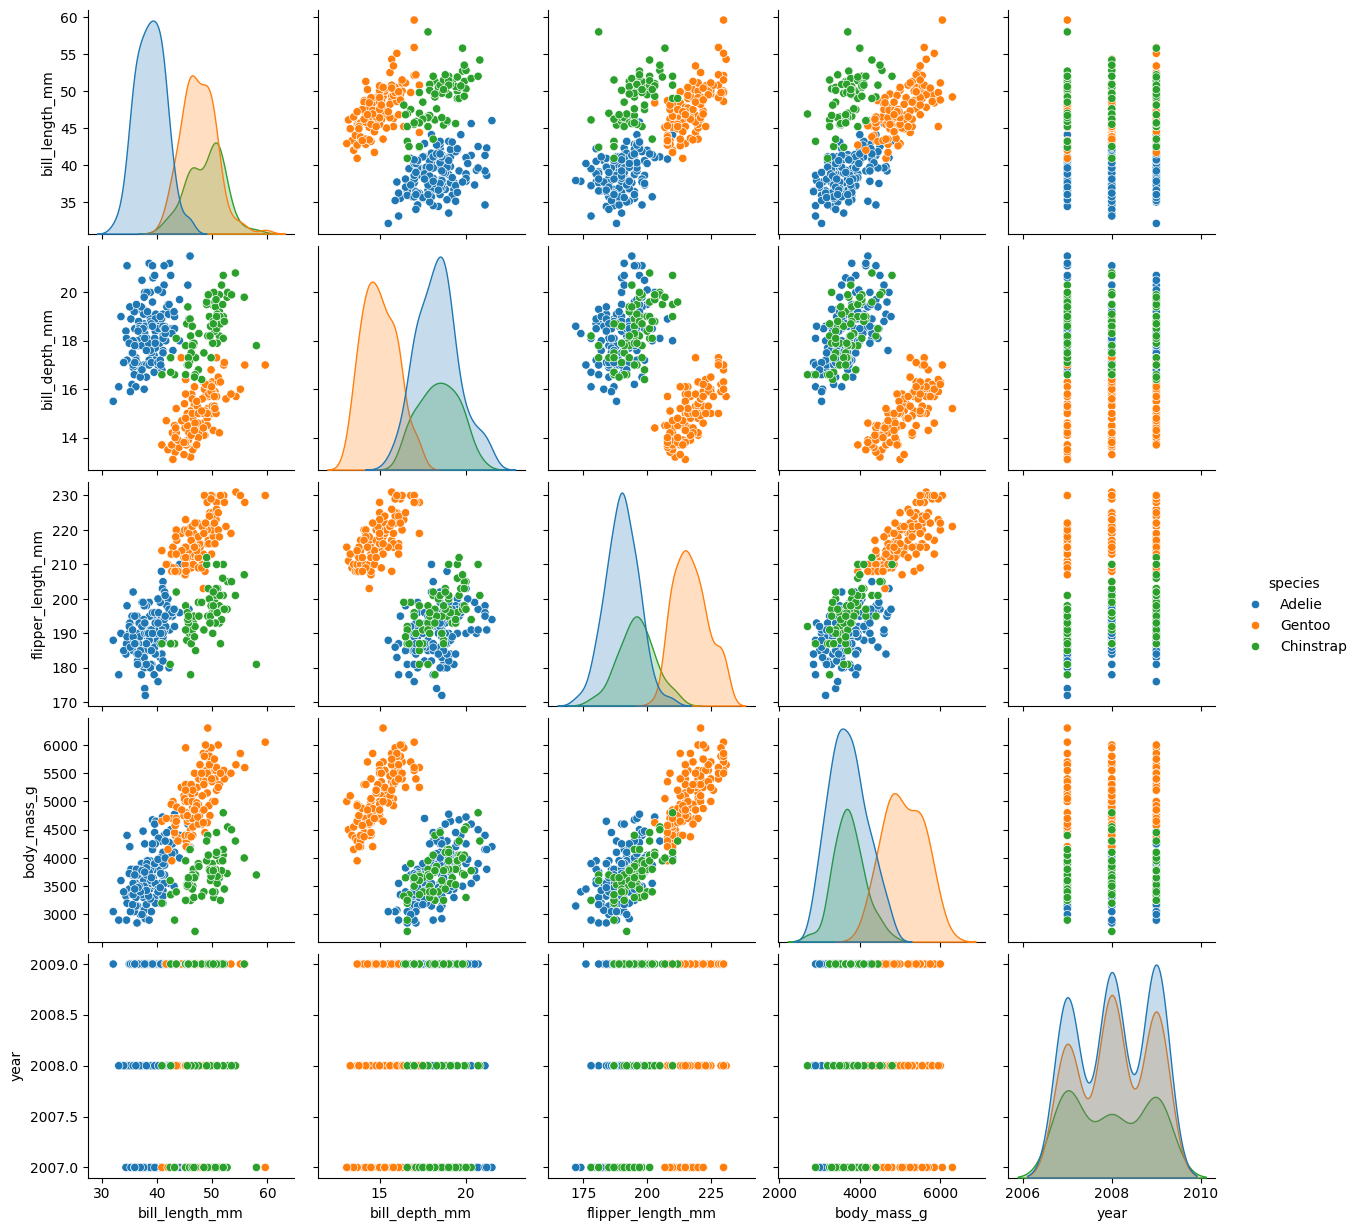

In [51]:
# Use Seaborn’s pairplot to visualize pairwise relationships in the dataset
import seaborn as sns

sns.pairplot(palmer_clean, hue='species')
plt.show()

We can see thst Gentoo spicie has larger body mass and bigger flippers compared to other species, but theirs bill depth lesser. Bill length of Adelie specie is lesser then for others species. Chinstar specie has a lot of common with Adelie specie.